**Clustering based on PCA result**

In [29]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

k = 2, Silhouette Score = 0.1713
k = 3, Silhouette Score = 0.1749
k = 4, Silhouette Score = 0.1707
k = 5, Silhouette Score = 0.0888
k = 6, Silhouette Score = 0.0967
k = 7, Silhouette Score = 0.1197
k = 8, Silhouette Score = 0.1246
k = 9, Silhouette Score = 0.1418
k = 10, Silhouette Score = 0.1433


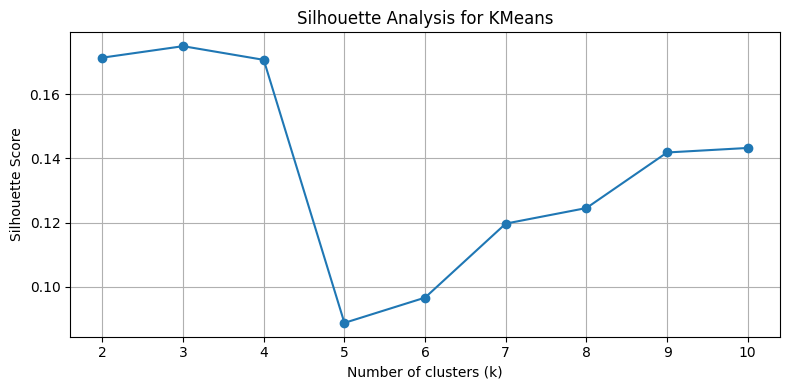

Optimal k: 3


C:\Users\john_\AppData\Local\Temp\ipykernel_23756\3667361355.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab10", optimal_k)


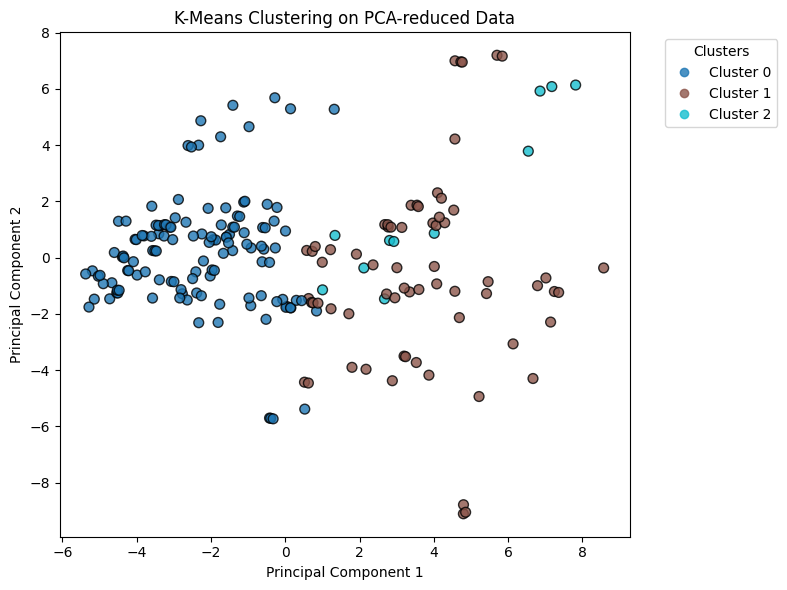

In [30]:


# 1. 读取 PCA 降维后的数据
df_pca = pd.read_csv("car_price_pca.csv")


ks = range(2, 11)
sil_scores = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(df_pca)
    sil_scores.append(silhouette_score(df_pca, labels))
    print(f"k = {k}, Silhouette Score = {sil_scores[-1]:.4f}")


plt.figure(figsize=(8, 4))
plt.plot(list(ks), sil_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for KMeans")
plt.xticks(list(ks))
plt.grid(True)
plt.tight_layout()
plt.savefig("silhouette_kmeans.png", dpi=300)
plt.show()


optimal_k = ks[np.argmax(sil_scores)]
print(f"Optimal k: {optimal_k}")
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_pca['cluster'] = kmeans.fit_predict(df_pca)


plt.figure(figsize=(8, 6))
cmap = get_cmap("tab10", optimal_k)
scatter = plt.scatter(
    df_pca['PC1'], df_pca['PC2'],
    c=df_pca['cluster'],
    cmap=cmap,
    s=50, alpha=0.8, edgecolors='k'
)

handles, labels = scatter.legend_elements(prop="colors")
plt.legend(handles, [f"Cluster {i}" for i in range(optimal_k)],
           title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on PCA-reduced Data")
plt.tight_layout()
plt.savefig("kmeans_pca_scatter.png", dpi=300)
plt.show()


In [31]:
df_orig = pd.read_csv("../car_price_preprocessed.csv")


df_orig['cluster'] = df_pca['cluster']


vw_cluster = df_orig.loc[df_orig['CarBrand_volkswagen'] == 1, 'cluster'].mode()[0]
print(f"Cluster number for Volkswagen: {vw_cluster}")


competitors = df_orig[df_orig['cluster'] == vw_cluster]

competitors.to_csv("vw_competitors.csv", index=False)
print(f"Found {len(competitors)} competitor models, saved to vw_competitors.csv")


Cluster number for Volkswagen: 0
Found 127 competitor models, saved to vw_competitors.csv


In [32]:
vw_competitor=pd.read_csv("vw_competitors.csv")
vw_competitor.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,cluster
0,4,0.8,audi 100 ls,0.455172,0.529851,0.491667,0.541667,0.329325,0.277457,0.464286,...,0,0,0,0,0,0,1,0,0,0
1,19,0.8,chevrolet impala,0.062069,0.000000,0.000000,0.450000,0.000000,0.000000,0.264286,...,0,0,1,0,0,0,0,0,0,0
2,20,0.6,chevrolet monte carlo,0.272414,0.220896,0.275000,0.350000,0.149728,0.167630,0.350000,...,0,0,1,0,0,0,0,0,0,0
3,21,0.4,chevrolet vega 2300,0.272414,0.264179,0.275000,0.350000,0.163305,0.167630,0.350000,...,0,0,1,0,0,0,0,0,0,0
4,22,0.6,dodge rampage,0.244828,0.241791,0.291667,0.250000,0.150504,0.167630,0.307143,...,0,0,1,0,0,0,0,0,0,0
